In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis: Climate Data

In [ ]:
# read in prism data
prism = pd.read_csv("https://raw.githubusercontent.com/mckenzie-maidl/data5100-climate-agriculture/main/Cleaned%20Data/prism.csv")
prism.head()

,Unnamed: 0,ppt (inches),tmin (degrees F),tmean (degrees F),tmax (degrees F),tdmean (degrees F),vpdmin (hPa),vpdmax (hPa),County,year,month
0,0,2.00,20.1,26.7,33.2,21.2,0.45,1.93,Adams,1895,1
1,1,0.38,28.4,36.3,44.2,25.7,0.78,4.76,Adams,1895,2
2,2,0.38,28.5,40.0,51.5,26.4,0.90,7.99,Adams,1895,3
3,3,0.41,36.3,50.8,65.3,31.3,1.68,15.49,Adams,1895,4
4,4,0.91,41.6,55.3,69.0,37.0,1.78,17.02,Adams,1895,5


In [ ]:
prism.columns

Index(['Unnamed: 0', 'ppt (inches)', 'tmin (degrees F)', 'tmean (degrees F)',
       'tmax (degrees F)', 'tdmean (degrees F)', 'vpdmin (hPa)',
       'vpdmax (hPa)', 'County', 'year', 'month'],
      dtype='object')

In [ ]:
# drop unnamed column
prism = prism.drop('Unnamed: 0', axis = 1)

In [ ]:
# rename columns to have no spaces
prism = prism.rename(columns={'ppt (inches)':'ppt', 'tmin (degrees F)':'tmin', 'tmean (degrees F)':'tmean',
       'tmax (degrees F)':'tmax', 'tdmean (degrees F)':'tdmean', 'vpdmin (hPa)':'vpdmin',
       'vpdmax (hPa)':'vpdmax'})

In [ ]:
prism.head()

,ppt,tmin,tmean,tmax,tdmean,vpdmin,vpdmax,County,year,month
0,2.00,20.1,26.7,33.2,21.2,0.45,1.93,Adams,1895,1
1,0.38,28.4,36.3,44.2,25.7,0.78,4.76,Adams,1895,2
2,0.38,28.5,40.0,51.5,26.4,0.90,7.99,Adams,1895,3
3,0.41,36.3,50.8,65.3,31.3,1.68,15.49,Adams,1895,4
4,0.91,41.6,55.3,69.0,37.0,1.78,17.02,Adams,1895,5


In [ ]:
# compute tdiff, vpddiff, vpdmean
prism['tdiff'] = prism['tmax'] - prism['tmin']
prism['vpddiff'] = prism['vpdmax'] - prism['vpdmin']
prism['vpdmean'] = (prism['vpdmax'] + prism['vpdmin']) / 2

### Average Temps

In [ ]:
# see max and min years
print(prism["year"].max())
print(prism["year"].min())

2021
1895


#### Histograms

Text(0.5, 1.0, 'Distribution of Precipitation')

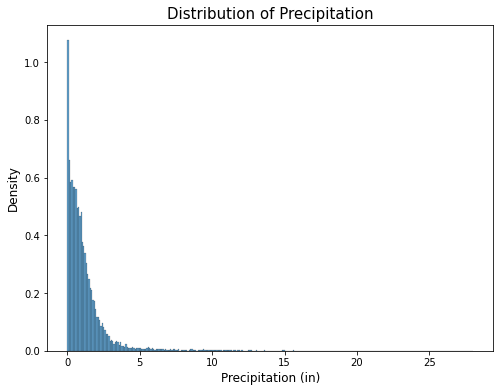

In [ ]:
# histogram of precipitation
plt.figure(figsize = (8, 6))

sns.histplot(data = prism, x = 'ppt', alpha = 0.7, stat='density')
plt.xlabel("Precipitation (in)", fontsize = 12)
plt.ylabel("Density", fontsize = 12)
plt.title("Distribution of Precipitation", fontsize = 15)

Text(0.5, 1.0, 'Distribution of Average Temperature (1881 - 2022)')

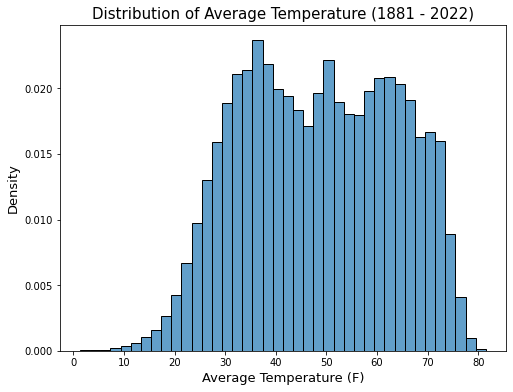

In [ ]:
# histogram of average temperature
plt.figure(figsize = (8, 6))

sns.histplot(data = prism, x = "tmean",
             alpha = 0.7, stat = "density")
plt.xlabel("Average Temperature (F)", fontsize = 13)
plt.ylabel("Density", fontsize = 13)
plt.title("Distribution of Average Temperature (1881 - 2022)", fontsize = 15)

Text(0.5, 1.0, 'Distribution of Lowest Temperature')

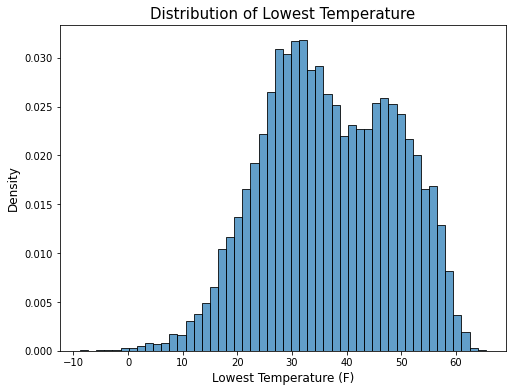

In [ ]:
# histogram of lowest temperature
plt.figure(figsize = (8, 6))

sns.histplot(data = prism, x = 'tmin', alpha = 0.7,
             stat = 'density')
plt.xlabel("Lowest Temperature (F)", fontsize = 12)
plt.ylabel("Density", fontsize = 12)
plt.title("Distribution of Lowest Temperature", fontsize = 15)

Text(0.5, 1.0, 'Distribution of Highest Temperature')

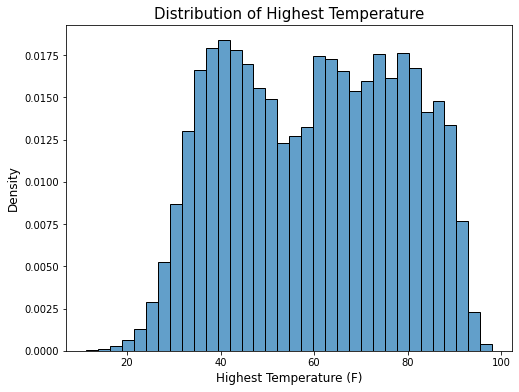

In [ ]:
# histogram of highest temperature
plt.figure(figsize = (8, 6))

sns.histplot(data = prism, x = 'tmax', alpha = 0.7,
             stat = 'density')
plt.xlabel("Highest Temperature (F)", fontsize = 12)
plt.ylabel("Density", fontsize = 12)
plt.title("Distribution of Highest Temperature", fontsize = 15)

#### Lineplots

In [ ]:
# aggregate data over years since 1970
prism_1970 = prism.loc[prism['year'] >= 1970]
by_year_1970 = prism_1970.groupby('year').mean()
by_year_1970['year'] = by_year_1970.index

Text(0.5, 1.0, 'Average Temperature by Year (1970 - 2021)')

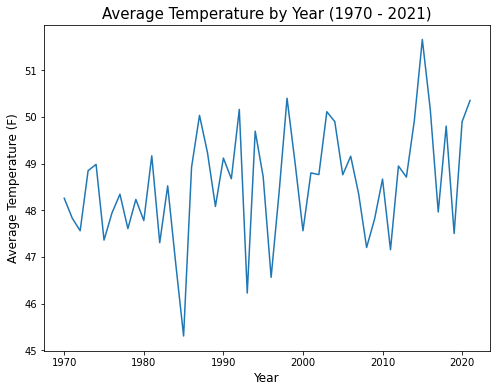

In [ ]:
# plot mean temp from 1970 to 2021
plt.figure(figsize = (8, 6))

by_year_1970['tmean'].plot()
plt.xlabel("Year", fontsize = 12)
plt.ylabel("Average Temperature (F)", fontsize = 12)
plt.title("Average Temperature by Year (1970 - 2021)", fontsize = 15)

Text(0.5, 1.0, 'Average Temperature by Year (1970 - 2021)')

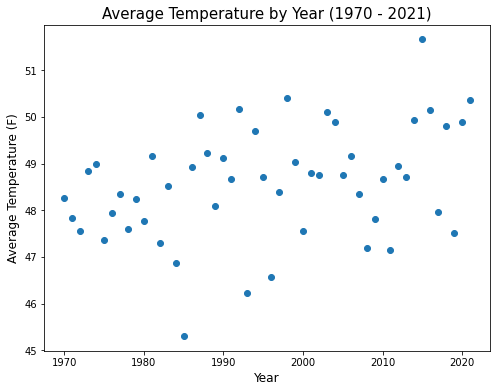

In [ ]:
# plot scatter plot of mean temp from 1970 to 2021
plt.figure(figsize = (8, 6))

plt.scatter(by_year_1970['year'], by_year_1970['tmean'])
plt.xlabel("Year", fontsize = 12)
plt.ylabel("Average Temperature (F)", fontsize = 12)
plt.title("Average Temperature by Year (1970 - 2021)", fontsize = 15)

Text(0.5, 1.0, 'Average Precipitation by Year (1970 - 2021)')

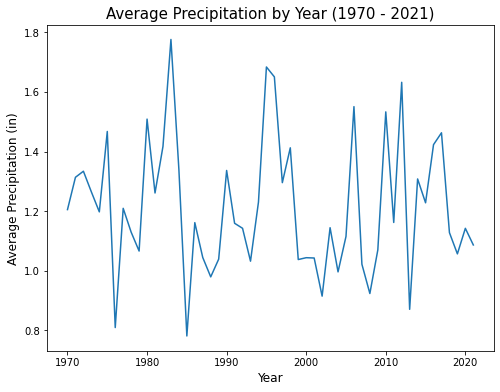

In [ ]:
# plot average precipitation from 1970 to 2021
plt.figure(figsize = (8, 6))

by_year_1970['ppt'].plot()
plt.xlabel("Year", fontsize = 12)
plt.ylabel("Average Precipitation (in)", fontsize = 12)
plt.title("Average Precipitation by Year (1970 - 2021)", fontsize = 15)

Text(0.5, 1.0, 'Average Precipitation by Year (1970 - 2021)')

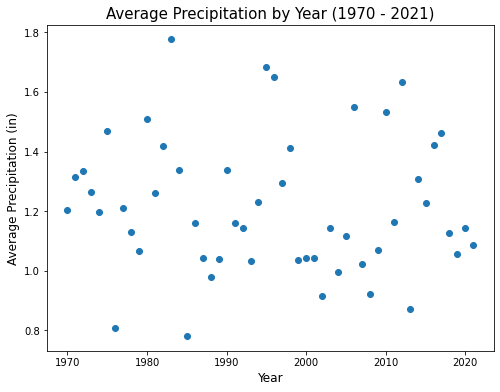

In [ ]:
# scatter plot of average precipitation from 1970 to 2021
plt.figure(figsize = (8, 6))

plt.scatter(by_year_1970['year'], by_year_1970['ppt'])
plt.xlabel("Year", fontsize = 12)
plt.ylabel("Average Precipitation (in)", fontsize = 12)
plt.title("Average Precipitation by Year (1970 - 2021)", fontsize = 15)

Text(0.5, 1.0, 'Mean Dew Point Temperature (F) (1970 - 2021)')

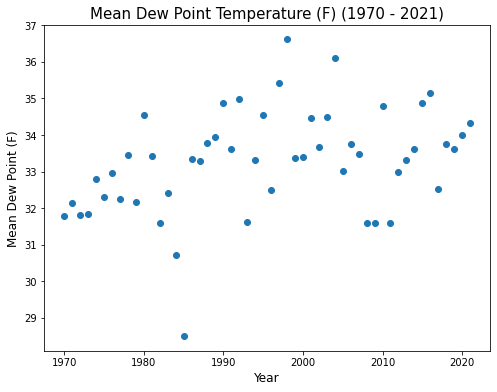

In [ ]:
# scatter plot of mean dew point temperature from 1970 to 2021
plt.figure(figsize = (8, 6))

plt.scatter(by_year_1970['year'], by_year_1970['tdmean'])
plt.xlabel("Year", fontsize = 12)
plt.ylabel("Mean Dew Point (F)", fontsize = 12)
plt.title("Mean Dew Point Temperature (F) (1970 - 2021)", fontsize = 15)

<Figure size 720x576 with 0 Axes>

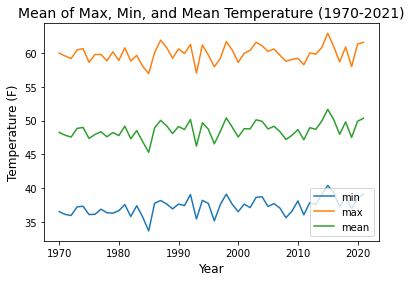

In [ ]:
# plot mean of max, min, mean temperature from 1970 to 2021
plt.figure(figsize = (10, 8))

by_year_1970[['tmin', 'tmax', 'tmean']].plot()
plt.xlabel("Year", fontsize = 12)
plt.ylabel("Temperature (F)", fontsize = 12)
plt.title("Mean of Max, Min, and Mean Temperature (1970-2021)", fontsize = 14)

plt.legend(labels = ['min', 'max', 'mean'])

plt.show()

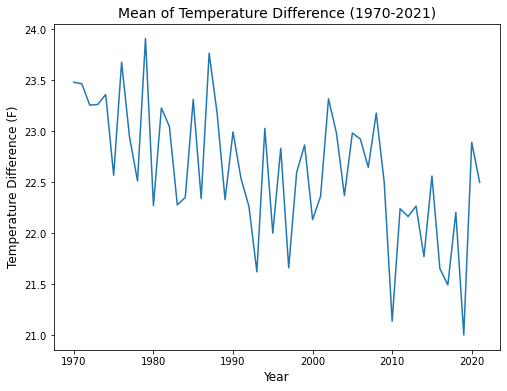

In [ ]:
# plot mean of temperature difference from 1970 to 2021
plt.figure(figsize = (8, 6))

by_year_1970['tdiff'].plot()
plt.xlabel("Year", fontsize = 12)
plt.ylabel("Temperature Difference (F)", fontsize = 12)
plt.title("Mean of Temperature Difference (1970-2021)", fontsize = 14)

plt.show()

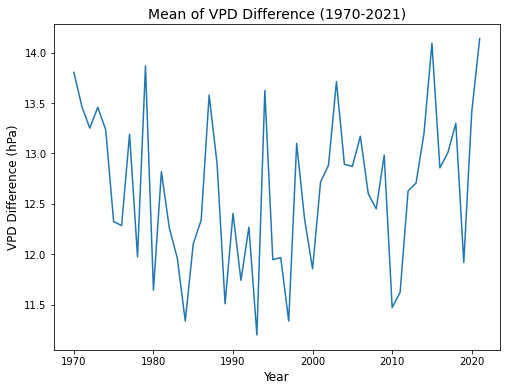

In [ ]:
# plot lineplot of VPD difference from 1970 to 2021
plt.figure(figsize = (8, 6))

by_year_1970['vpddiff'].plot()
plt.xlabel("Year", fontsize = 12)
plt.ylabel("VPD Difference (hPa)", fontsize = 12)
plt.title("Mean of VPD Difference (1970-2021)", fontsize = 14)

plt.show()

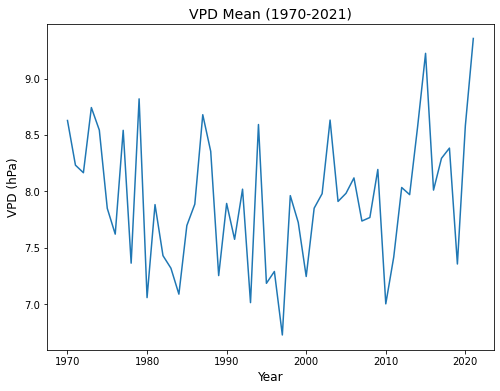

In [ ]:
# plot mean of VPD from 1970 to 2021
plt.figure(figsize = (8, 6))

by_year_1970['vpdmean'].plot()
plt.xlabel("Year", fontsize = 12)
plt.ylabel("VPD (hPa)", fontsize = 12)
plt.title("VPD Mean (1970-2021)", fontsize = 14)

plt.show()

<Figure size 576x432 with 0 Axes>

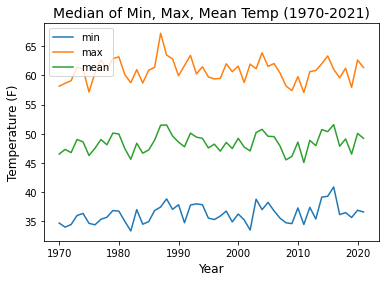

In [ ]:
# plot median of min, max, mean temperature since 1970
plt.figure(figsize = (8, 6))

med_1970 = prism_1970.groupby('year').median()

med_1970[['tmin', 'tmax', 'tmean']].plot()
plt.xlabel("Year", fontsize = 12)
plt.ylabel("Temperature (F)", fontsize = 12)
plt.title("Median of Min, Max, Mean Temp (1970-2021)", fontsize = 14)

plt.legend(labels=['min', 'max', 'mean'])

plt.show()

<Figure size 576x432 with 0 Axes>

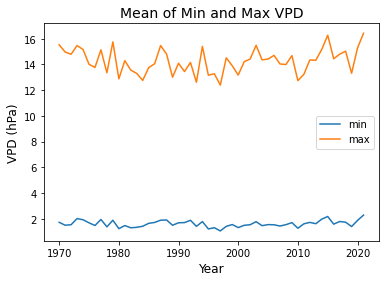

In [ ]:
# plot the mean of the VPD min and max
plt.figure(figsize = (8, 6))

by_year_1970[['vpdmin', 'vpdmax']].plot()
plt.xlabel("Year", fontsize = 12)
plt.ylabel("VPD (hPa)", fontsize = 12)
plt.title("Mean of Min and Max VPD", fontsize = 14)

plt.legend(labels=['min', 'max'])

plt.show()

<Figure size 576x432 with 0 Axes>

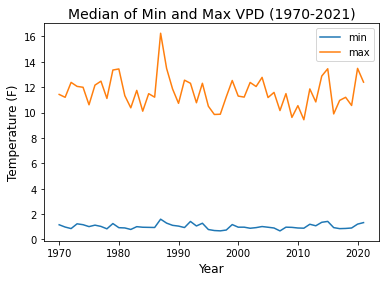

In [ ]:
# plot median of vpdmin, vpdmax  since 1970
plt.figure(figsize = (8, 6))

med_1970 = prism_1970.groupby('year').median()

med_1970[['vpdmin', 'vpdmax']].plot()
plt.xlabel("Year", fontsize = 12)
plt.ylabel("Temperature (F)", fontsize = 12)
plt.title("Median of Min and Max VPD (1970-2021)", fontsize = 14)

plt.legend(labels=['min', 'max'])

plt.show()

#### Boxplots

Text(0, 0.5, 'Year')

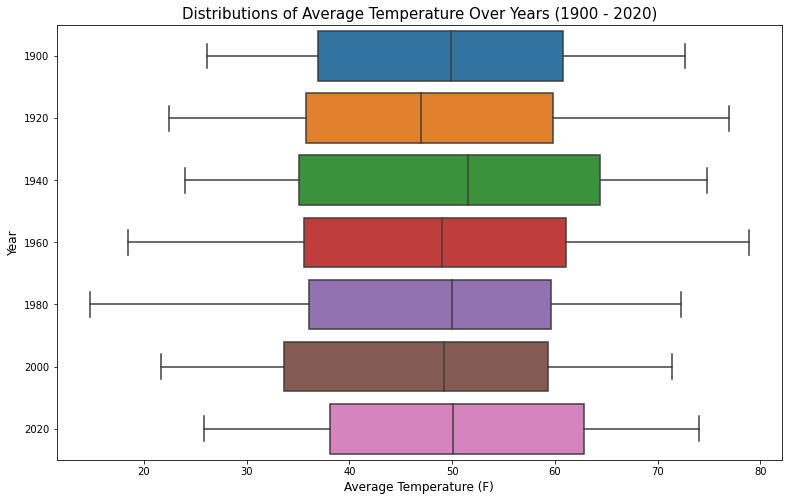

In [ ]:
# create boxplots for every 20 years for average temperature since 1900
plt.figure(figsize = (13, 8))

sns.boxplot(data = prism[prism["year"].isin([1900, 1920, 1940, 1960, 1980, 2000, 2020])],
            x = "tmean", y = "year", orient = "h")
plt.title("Distributions of Average Temperature Over Years (1900 - 2020)", fontsize = 15)
plt.xlabel("Average Temperature (F)", fontsize = 12)
plt.ylabel("Year", fontsize = 12)

Text(0, 0.5, 'Year')

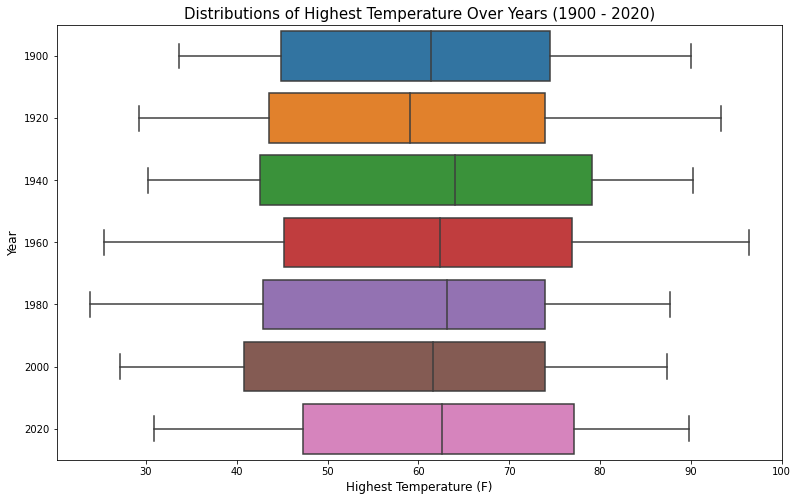

In [ ]:
# create boxplots for every 20 years for highest temperature since 1900
plt.figure(figsize = (13, 8))

sns.boxplot(data = prism[prism["year"].isin([1900, 1920, 1940, 1960, 1980, 2000, 2020])],
            x = "tmax", y = "year", orient = "h")
plt.title("Distributions of Highest Temperature Over Years (1900 - 2020)", fontsize = 15)
plt.xlabel("Highest Temperature (F)", fontsize = 12)
plt.ylabel("Year", fontsize = 12)

Text(0, 0.5, 'Year')

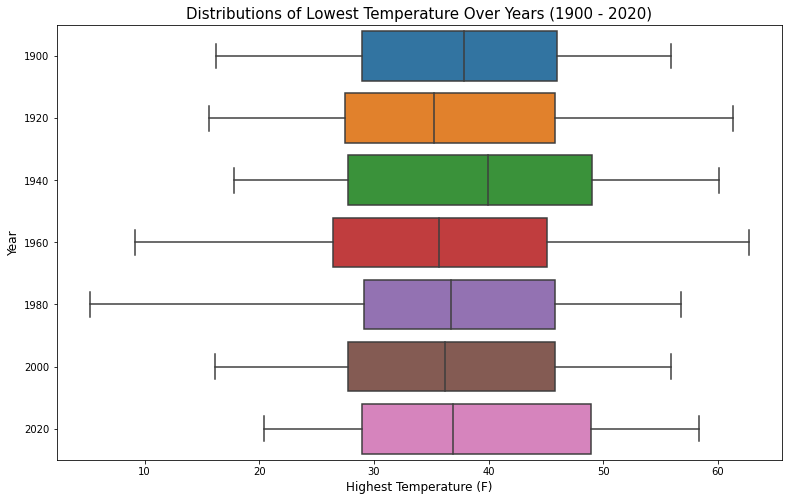

In [ ]:
# create boxplots for every 20 years for lowest temperature since 1900
plt.figure(figsize = (13, 8))

sns.boxplot(data = prism[prism["year"].isin([1900, 1920, 1940, 1960, 1980, 2000, 2020])],
            x = "tmin", y = "year", orient = "h")
plt.title("Distributions of Lowest Temperature Over Years (1900 - 2020)", fontsize = 15)
plt.xlabel("Highest Temperature (F)", fontsize = 12)
plt.ylabel("Year", fontsize = 12)

Text(0, 0.5, 'Year')

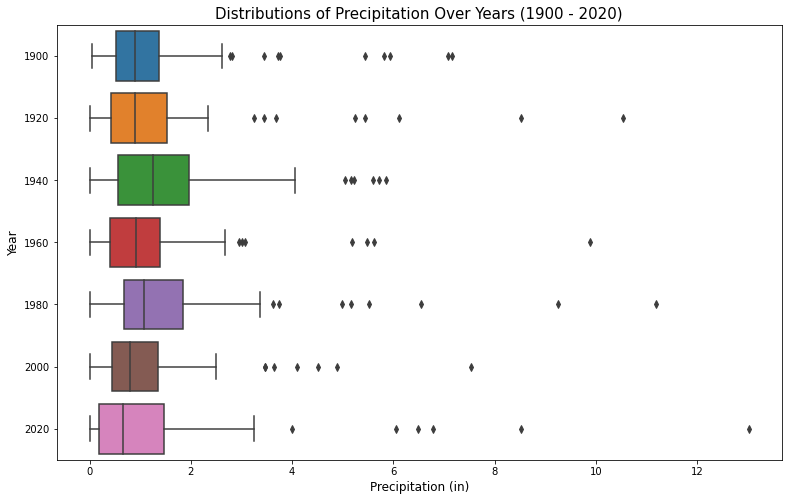

In [ ]:
# create boxplots for every 20 years for precipitation since 1900
plt.figure(figsize = (13, 8))

sns.boxplot(data = prism[prism["year"].isin([1900, 1920, 1940, 1960, 1980, 2000, 2020])],
            x = "ppt", y = "year", orient = "h")
plt.title("Distributions of Precipitation Over Years (1900 - 2020)", fontsize = 15)
plt.xlabel("Precipitation (in)", fontsize = 12)
plt.ylabel("Year", fontsize = 12)